29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
ขนาดข้อมูลหลัง Reshape: (60000, 28, 28, 1)


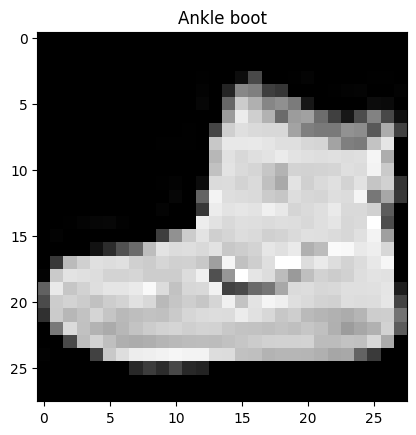

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1. โหลดข้อมูล Fashion MNIST (เสื้อผ้า 10 ประเภท)
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. Normalization (0-255 -> 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3. Reshape ข้อมูลให้เป็น 4 มิติ (Batch, Height, Width, Channel)
# เราเพิ่มเลข 1 ด้านหลัง เพราะเป็นภาพขาวดำ
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"ขนาดข้อมูลหลัง Reshape: {x_train.shape}") # ควรเป็น (60000, 28, 28, 1)

# 4. Dictionary แปลชื่อสินค้า (เอาไว้ดูตอนทาย)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# ลองดูรูปตัวอย่าง
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.title(class_names[y_train[0]])
plt.show()

In [2]:
model = tf.keras.models.Sequential([
    # --- ส่วนตาดวงตา (Feature Extraction) ---
    # Conv2D: ใช้ Filter 32 แบบ, ขนาด 3x3, activation relu
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # MaxPooling: ย่อภาพลงครึ่งนึง (2x2)
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # ทำซ้ำอีกรอบ (เพิ่มความละเอียดเป็น 64 Filter)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # --- ส่วนสมอง (Classification) ---
    tf.keras.layers.Flatten(), # แปลงเป็นเส้นตรง (หลังจากสกัด Feature มาแล้ว)
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # คำตอบ 10 ประเภท
])

model.summary()

C:\Users\torpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# เทรน 5 รอบ
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8324 - loss: 0.4629 - val_accuracy: 0.8732 - val_loss: 0.3574
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8878 - loss: 0.3095 - val_accuracy: 0.8904 - val_loss: 0.3088
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9049 - loss: 0.2626 - val_accuracy: 0.9023 - val_loss: 0.2773
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9147 - loss: 0.2337 - val_accuracy: 0.9082 - val_loss: 0.2527
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9219 - loss: 0.2086 - val_accuracy: 0.9092 - val_loss: 0.2594


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


C:\Users\torpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\torpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\torpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\torpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCach

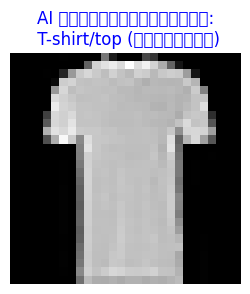

Confidence (ความมั่นใจ): 99.81%


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. สร้างพจนานุกรมชื่อสินค้า (เพื่อให้คนอ่านรู้เรื่อง)
class_names = [
    "T-shirt/top (เสื้อยืด)", 
    "Trouser (กางเกงขายาว)", 
    "Pullover (เสื้อสวมหัว)", 
    "Dress (ชุดเดรส)", 
    "Coat (เสื้อโค้ท)",
    "Sandal (รองเท้าแตะ)", 
    "Shirt (เสื้อเชิ้ต)", 
    "Sneaker (รองเท้าผ้าใบ)", 
    "Bag (กระเป๋า)", 
    "Ankle boot (รองเท้าบูท)"
]

# 2. เลือกรูปภาพจาก x_test มา 1 รูป (ลองเปลี่ยนเลข 88 เป็นเลขอื่นได้นะครับ)
img_index = 88  
target_image = x_test[img_index]

# 3. เตรียมข้อมูลก่อนส่งให้ AI (สำคัญมาก! ตาม Hint)
# AI รับข้อมูลทีละล็อต เลยต้องเพิ่มมิติข้างหน้า 1 ช่อง: จาก (28, 28) -> (1, 28, 28)
# และถ้าเป็น CNN ต้องมีช่องสีด้วย -> (1, 28, 28, 1)
input_image = target_image.reshape(1, 28, 28, 1)

# 4. ให้โมเดลทำนาย
prediction = model.predict(input_image)
predicted_id = np.argmax(prediction) # หาว่าความน่าจะเป็นช่องไหนสูงที่สุด
predicted_name = class_names[predicted_id]

# 5. แสดงผลลัพธ์แบบ Lazada/Shopee
plt.figure(figsize=(3,3))
plt.imshow(target_image, cmap='gray') # แสดงรูปสินค้า
plt.title(f"AI ทายว่าสินค้าคือ:\n {predicted_name}", color='blue') # แสดงชื่อสินค้า
plt.axis('off') # ปิดแกนเลขให้สวยงาม
plt.show()

print(f"Confidence (ความมั่นใจ): {np.max(prediction)*100:.2f}%")

In [6]:
# Save โมเดลเป็นไฟล์ .h5 (หรือ .keras ในเวอร์ชันใหม่)
model.save('my_fashion_model.h5')

print("✅ บันทึกโมเดลสำเร็จ! ลองดูใน Folder ซิ มีไฟล์ใหม่มามั้ย?")

✅ บันทึกโมเดลสำเร็จ! ลองดูใน Folder ซิ มีไฟล์ใหม่มามั้ย?
